In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def _read_dataframe(fname='20220413_MF.csv'):
    dataframe = pd.read_csv(fname)
    assert 'redshift' in dataframe.columns and 'Mvir' in dataframe.columns
    if 'split' not in dataframe:
        pass
        #dataframe = dataframe.iloc[np.random.RandomState(7).choice(dataframe.index, int(0.2 * len(dataframe)), replace=False)]
    else:
        dataframe = dataframe[dataframe['split'] == 'test']
    return dataframe.reset_index().reindex(columns=['redshift', 'Mvir'])
df = _read_dataframe('/srv/scratch1/zhenlin4/deepszUQ/Temp/20220910_filter_z0.1_m1e14.csv')
df

,redshift,Mvir
0,0.1005,1.724286e+14
1,0.1007,1.246599e+14
2,0.1005,1.169708e+14
3,0.1005,3.611967e+14
4,0.1009,5.762038e+14
...,...,...
83823,2.5952,1.028421e+14
83824,2.6017,1.029382e+14
83825,2.5939,1.179320e+14
83826,2.6291,1.113962e+14


In [8]:

from colossus.cosmology import cosmology as cocosmology
from colossus.lss import mass_function
cosmology = {
                 'Omega_m': 0.264,
                 'Omega_b': 0.044, #block.get_double('cosmological_parameters', 'Omega_b'),
                 'Omega_l': 0.736,
                 'w0': -1.0,
                 'wa': 0.0,
                 'h': 0.71,
                 'sigma8': 0.80,
                 'ns': 0.96,
                 'mass_bias': 1.0,
                 'Tcmb0' : 2.726,
    }

co_params = {'flat': True}
for me,co in zip(['h', 'Omega_m', 'Omega_b', 'sigma8', 'ns', 'Tcmb0'],
                     ['H0', 'Om0', 'Ob0', 'sigma8', 'ns', 'Tcmb0']):
    co_params[co] = cosmology[me]
co_params['H0']*= 100

_ = cocosmology.setCosmology('', co_params)
cosmo = cocosmology.getCurrent()

In [14]:

M_arr = np.logspace(13.9,16,256)
z_arr = np.linspace(.1,2,128)
massfunc = np.array([mass_function.massFunction(M_arr, z, mdef='vir', model='despali16', q_in='M', q_out='dndlnM') for z in z_arr])

z in [0.5338582677165354, 0.5637795275590551]


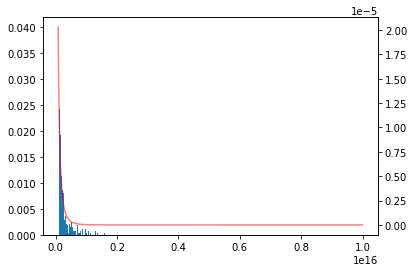

In [34]:
z_loc = 30
z_min, z_max = z_arr[z_loc - 1], z_arr[z_loc + 1]
tdf = df[(df['redshift'] >= z_min) & (df['redshift'] <= z_max)]
_ = plt.hist(tdf['Mvir'], bins=M_arr, weights=1./len(tdf) * np.ones(len(tdf)))
ax = plt.twinx()
ax.plot(M_arr, massfunc[z_loc], color='red', alpha=0.5)
print(f"z in [{z_min}, {z_max}]")